<a href="https://colab.research.google.com/github/ArjunVerma/Fashion-Image-Recognition/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!git clone https://github.com/ArjunVerma/Fashion-Image-Recognition.git

fatal: destination path 'Fashion-Image-Recognition' already exists and is not an empty directory.


In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Importing dataset
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Names in the order in which labels are mapped to the numbers
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

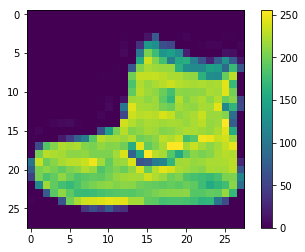

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

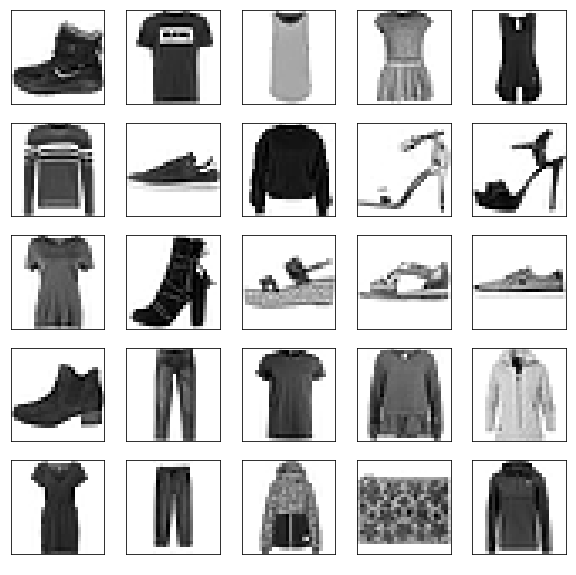

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]]).set_color('white')
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(10, activation= tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer= 'adam',
               loss= 'sparse_categorical_crossentropy',
               metrics= ['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs= 5)

Epoch 1/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.5013 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3764 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3399 - acc: 0.8756
Epoch 4/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3168 - acc: 0.8839
Epoch 5/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2977 - acc: 0.8910


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy : ', test_acc)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.3603 - acc: 0.8721
Test accuracy :  0.8721


In [0]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([3.62632018e-05, 8.35762330e-06, 2.57909028e-06, 5.27695420e-07,
       1.69227030e-06, 1.07305035e-01, 5.91278913e-05, 7.33388588e-02,
       2.51485675e-04, 8.18996072e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9